<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/roc_curve_and_area_under_curve__titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

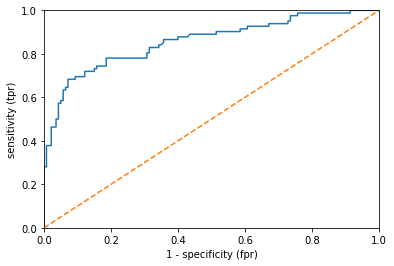

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['Male'] = df['Sex'] == 'male' # create new column 'male' with Boolean 0/1 values corresponding to 'Sex' strings

X = df[['Pclass', 'Male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5) # lock the random split with 'random_state=5'

model = LogisticRegression() # instantiate model
model.fit(X_train, y_train) # fit on training data

# sensitivity = true positive rate =  TP / (TP + FN)
# specificity = true negative rate =  TN / (TN + FP)
# 1 - specificity = false positive rate =  1 - (TN / (TN + FP))  =  FP / (TN + FP)

# ROC curve typically:        sensitivity VS 1 - specificity
# in other words:      true positive rate VS false positive rate 

y_pred_proba = model.predict_proba(X_test) # prediction probabilities on testing data
                                           # outputs two columns: probability in 0 class (died), probability in 1 class (survived)
y_survival_proba = y_pred_proba[:,1] # we only need second column: probability survived
                                     # assign to new variable 'y_survival_proba'

fpr, tpr, thresholds = roc_curve(y_test, y_survival_proba) # pass actual targets and predicted probabilities to 'roc_curve()' 
                                                   # function returns list of 3 arrays: false positive rates, true positive rates, and thresholds
                                                   # assign each array to variables 'fpr' 'tpr' 'thresholds' respectively

# plotting ROC curve                                          
plt.plot(fpr, tpr) # plot false positive rate VS true positive rate 
plt.plot([0, 1], [0, 1], linestyle='--') # plot diagonal line from 0,0 to 1,1 to allow comparison to model predicting randomly 
plt.xlim([0, 1]) # crop plot on x axis 
plt.ylim([0, 1]) # crop plot on y axis 
plt.xlabel('1 - specificity (fpr)')
plt.ylabel('sensitivity (tpr)')
plt.show()


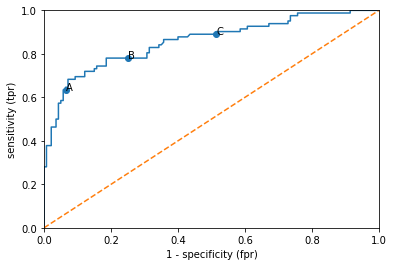

In [3]:
# interpreting ROC curve

plt.plot(fpr, tpr)  
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('1 - specificity (fpr)')
plt.ylabel('sensitivity (tpr)')
plt.scatter([fpr[17],fpr[33],fpr[47]],[tpr[17],tpr[33],tpr[47]]) # plotting three models via 'fpr' and 'tpr' arrays 
plt.annotate(s='A', xy=(fpr[17],tpr[17])) # labelling the three models 
plt.annotate(s='B', xy=(fpr[33],tpr[33]))
plt.annotate(s='C', xy=(fpr[47],tpr[47]))
plt.show()
# Each point A, B & C refers to a model with a different threshold.
# Model A has a sensitivity of 0.6 and a specificity of 0.9 (recall that the graph is showing 1-specificity).
# Model B has a sensitivity of 0.8 and a specificity of 0.7.
# Model C has a sensitivity of 0.9 and a specificity of 0.5.

# The closer the curve gets to the upper left corner, the better the performance
# The line should never fall below the diagonal line as that would mean it performs worse than a random model

# Which threshold to choose for our final model depends on the situation
# if we want higher specificity (and precision) we should choose model A (more important that all positive predictions are correct than that we catch all positive cases)
# if we want higher sensitivity we should choose model C (more important that we catch as many positive cases as possible)
# If we want a balance between sensitivity and specificity, we should choose model B.


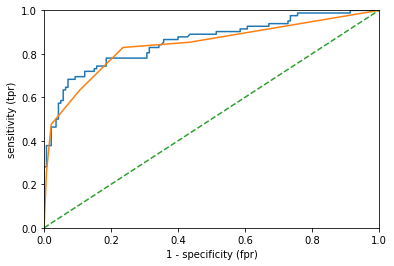

model 1 AUC score: 0.8572299651567944
model 2 AUC score: 0.8390679442508711


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['Male'] = df['Sex'] == 'male'
X = df[['Pclass', 'Male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

## Area Under Curve (AUC)

# ROC Curve shows different thresholds for the same logistic regression model. This helps us choose the best threshold for our final model.
# AUC allows us to compare ROC Curves for different logistic regression models. This helps us choose the best combination of features for our final model.
# AUC value between 0 and 1, the higher the better

model1 = LogisticRegression() 
model1.fit(X_train, y_train) # fit on training data, all 6 features
y_pred_proba1 = model1.predict_proba(X_test) # prediction probabilities on testing data
                                             # outputs 2 columns: probability in 0 class (died), probability in 1 class (survived)
y_survival_proba1 = y_pred_proba1[:,1] # we only need 2nd column: probability survived
                                       # assign to new variable 'y_survival_proba1'
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_survival_proba1) # pass actual targets and predicted probabilities to 'roc_curve()' 
                                                   # function returns list of 3 arrays: false positive rates, true positive rates, and thresholds
                                                   # assign each array to variables 'fpr1' 'tpr1' 'thresholds1' respectively                                      


model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train) # fitting only on first 2 columns of 'X_train' (first 2 features 'Pclass' and 'Male')
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2]) # prediction probabilities on first 2 columns of 'X_test' (first 2 features 'Pclass' and 'Male')
                                                     # outputs 2 columns: probability in 0 class (died), probability in 1 class (survived)
y_survival_proba2 = y_pred_proba2[:,1] # we only need 2nd column: probability survived
                                       # assign to new variable 'y_survival_proba2'
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_survival_proba2) # pass actual targets and predicted probabilities to 'roc_curve()' 
                                                   # function returns list of 3 arrays: false positive rates, true positive rates, and thresholds
                                                   # assign each array to variables 'fpr2' 'tpr2' 'thresholds2' respectively

# plotting ROC curves for the two models                                        
plt.plot(fpr1, tpr1) # plot model 1 curve
plt.plot(fpr2, tpr2) # plot model 2 curve
plt.plot([0, 1], [0, 1], linestyle='--') # plot diagonal line from 0,0 to 1,1 to allow comparison to model predicting randomly 
plt.xlim([0, 1]) # crop plot on x axis 
plt.ylim([0, 1]) # crop plot on y axis 
plt.xlabel('1 - specificity (fpr)')
plt.ylabel('sensitivity (tpr)')
plt.show()

# we can see model 1 is almost always above model 2 (closer to ideal top left corner) so seems to be better.

print("model 1 AUC score:", roc_auc_score(y_test, y_survival_proba1)) # pass actual targets and predicted probabilities to 'roc_auc_score()' to get AUC score
print("model 2 AUC score:", roc_auc_score(y_test, y_survival_proba2)) # pass actual targets and predicted probabilities to 'roc_auc_score()' to get AUC score

# model 1 has higher AUC score, so better model. 

# code and comments by github.com/alandavidgrunberg
